# <div align="right">Machine Learning
##### <div align="right"> *Followblindly*

# 09 - Support Vector Machine

**Support Vector Machine(SVM)** is a supervised machine learning algorithm which can be used for both **classification** or **regression** challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

The goal is to learn a hyperplane that discriminates between classes; we find a decision boundary which maximum separation between two classes. We consider two cases:

* **Hard Margin:** Classes are linear separable. We find a hyperplane with margin that maxmally seperates the twp classes.

* **Soft Margin:** Classes are not linear separable. We allow error (slack) in the model fitting and find a decision boundary with the minimum slack required to discriminate between two classes.

<img src="09_images/9_Hard_and_Soft.PNG" width=600px/>

## Hard Margin SVM

**Illustration:** If the data is linear separable, there exist an infinite number of hyperplanes that can separate the two classes. The algorithm looks for the best hyperplane; the one with largest margin.

* Hyperplane separating the two classes: $\beta^{T}x+\beta_{0}=0$
* Set the labels: $y_{i}\in\{-1,1\}$
* We can classify points as $sign\{d_{i}\}$ where $d_{i} = \beta^{T}x_{i}+\beta_{0}$

**Margin:** The distance between the hyperplane and the closest points.

**Goal:** Maximize the Magin

$$
Margin = min\{y_{i}d_{i}\}, \ \ \ \ i=1,2,3,...,n
$$

* Where $y_{i}$ is label and $d_{i}$ is distance

<img src="09_images/9_Distance.PNG" width=400px/>

**(1).** $\beta$ is orthogonal to the hyperplane. Consider $x_{1}$ and $x_{2}$ not on the hyperplane. Then, 

$$
\beta^{T}x_{1}+\beta_{0} = \beta^{T}x_{2}+\beta_{0} = 0 \\
\Rightarrow \beta^{T}(x_{1}-x_{2}) = 0  \\
\Rightarrow \beta \ is \ orthogonal \ to \ (x_{1}-x_{2}).
$$

**(2).** For any $x_{0}$ on the hyperplane,

$$
\beta^{T}x_{0}+\beta_{0}=0 \Rightarrow \beta^{T}x_{0} = -\beta_{0}
$$

**(3).** The distance $d_{i}$ is the projection of $(x_{i}-x_{0})$ to the direction of $\beta$.

$$
\begin{align*}
d_{i}&=\frac{\beta^{T}(x_{i}-x_{0})}{\parallel\beta\parallel} \\
&=\frac{\beta^{T}x_{i}-\beta^{T}x_{0}}{\parallel\beta\parallel} \\
&=\frac{\beta^{T}x_{i}-\beta_{0}}{\parallel\beta\parallel} \\
\end{align*}
$$

Thus, 

$$
Margin = min\{y_{i}d_{i}\} = min\{\frac{y_{i}\beta^{T}x_{i}-\beta_{0}}{\parallel\beta\parallel}\}
$$

**(4).** If the point is not on the hyperplane, then

$$
y_{i}(\beta^{T}x_{i}+\beta_{0}) > 0 \\
\Rightarrow \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq c \\
\Rightarrow \ y_{i}\frac{(\beta^{T}x_{i}+\beta_{0})}{c} \geq 1 \\
\Rightarrow \ There \ exist \ \beta \ and \ \beta_{0} \ such \ that \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq 1 \\
$$

Therefore, 

$$
Margin = \frac{1}{\parallel\beta\parallel}
$$

<img src="09_images/9_Hard_Margin.PNG" width=400px/>

The original problem can be reduced now to:

$$
min_{\beta,\beta_{0}}\frac{1}{2}{\parallel\beta\parallel}^{2} \\
Subject \ to \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq 1, i =1,2,...,n
$$

### Lagrange Method

From the lagrangian, we can have:

$$
\begin{align*}
L_{p}&=\frac{1}{2}{\parallel\beta\parallel}^{2}-\sum_{i=1}^{n}\alpha_{i}[ y_{i}(\beta^{T}x_{i}+\beta_{0})-1] \\
&= \frac{1}{2}\beta^{T}\beta - \beta^{T}\sum_{i=1}^{n}\alpha_{i}y_{i}x_{i}-\beta_{0}\sum_{i=1}^{n}\alpha_{i}y_{i}+\sum_{i=1}^{n}\alpha_{i}
\end{align*}
$$

$$ 
\frac{\partial L_{p}}{\partial \beta}=\beta - \sum_{i=0}^{n}\alpha_{i}y_{i}x_{i} = 0 \Rightarrow \beta = \sum_{i=0}^{n}\alpha_{i}y_{i}x_{i} \\
\frac{\partial L_{p}}{\partial \beta_{0}}=-\sum_{i=0}^{n}\alpha_{i}y_{i} = 0 \Rightarrow \sum_{i=0}^{n}\alpha_{i}y_{i} = 0
$$

Substituting this in the lagrangian we obtain:

$$
\begin{align*}
max_{\alpha_{i}}\sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i=1}^{n}&\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}x_{i}^{T}x_{j} \\
Subject \ to \ \alpha_{i} &\geq 0 \\
\sum_{i=1}^{n}\alpha_{i}y_{i}&=0
\end{align*}
$$

Our **primal optimization problem** with the Lagrangian becomes the following: 

$$
min_{\beta,\beta_{0}}(max_{\alpha_{i}}L(\beta,\beta_{0},\alpha))
$$

### Dual Problem

What @Antoni and Prof. Patrick Winston have done in their derivation is assume that the optimization function and the constraints meet some technical conditions such that we can do the following:

$$
min_{\beta,\beta_{0}}(max_{\alpha_{i}}L(\beta,\beta_{0},\alpha))=max_{\alpha_{i}}(min_{\beta,\beta_{0}}L(\beta,\beta_{0},\alpha))
$$

This allows us to take the partial derivatives of $L(\beta,\beta_{0},\alpha)$ with respect to $\beta$ and $\beta_{0}$, equate to zero and then plug the results back into the original equation of the Lagrangian, hence generating an equivalent **dual** optimization problem of the form

$$
\begin{align*}
&max_{\alpha_{i}}(min_{\beta,\beta_{0}}L(\beta,\beta_{0},\alpha)) \\
&max_{\alpha_{i}}\sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i},x_{j}> \\
&s.t. \ \alpha_{i} \geq 0 \\
&s.t. \ \sum_{i=1}^{n}\alpha_{i}y_{i}=0
\end{align*}
$$

### Optimization – Karush–Kuhn–Tucker (KKT) conditions

Without going into excessive mathematical technicalities, these conditions are a combination of the Duality and the Karush Kuhn Tucker (KTT) conditions and allow us to solve the **dual** problem instead of the **primal** one, while ensuring that the optimal solution is the same. In our case the conditions are the following:

* The primal objective and inequality constraint functions must be convex
* The equality constraint function must be affine
* The constraints must be strictly feasible

Then there exists $x^{*}$,$\alpha^{*}$ which are solutions to the primal and dual problems.

$$
min_{x}f(x) \\
subject \ to \ g(x)\leq 0
$$

* If $x^{*}$ is a local optimum, subject to regularity conditions, then there exist constant multipliers $\alpha_{i}^{*}$ such that

$$
\begin{align*}
&\frac{\partial}{\partial x}L(x^{*}) = 0 \\
&g(x^{*}) \leq 0 \\
&\alpha_{i}^{*} \geq 0 \\
&\alpha_{i}^{*}g(x^{*})=0, \forall i
\end{align*}
$$

From the complementary slackness (**KKT Conditions**), we have $\alpha_{i}^{*}g(x^{*})=\alpha_{i}^{*}[y_{i}(\beta^{T}x_{i}+\beta_{0})-1] = 0$ we can see that

* if $\alpha_{i}^{*} > 0$, then $y_{i}(\beta^{T}x_{i}+\beta_{0})-1 = 0$, i.e. $x_{i}$ is on the margin. This point is called **support vector**.
* if $y_{i}(\beta^{T}x_{i}+\beta_{0}) > 1$, $x_{i}$ is not on the margin, and $\alpha_{i}^{*}=0$

This is a convex optimization and can be solved by quadratic programming. 

## Soft Margin SVM

Having a dataset with linear separable classes is very unlikely in practice, so we remove this requirement. We now consider a dataset where both classes overlap such that no hyperplane exists that can completely seperate the two classes on the training data. Instead, the **goal** becomes to find a hyperplane which minimizes the amount of datapoints that "spill" over to the opposite sides.

We allow points to violate our previous constraint by some error $\zeta$, but penalize the objective function the more it is violated. Our new optimization problem becomes:

$$
min_{\beta,\beta_{0}}\frac{1}{2}{\parallel\beta\parallel}^{2}+\gamma\sum_{i=1}^{n}\zeta_{i} \\
Subject \ to \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq 1-\zeta_{i}, \forall i \\
\zeta_{i} \geq 0, \forall i
$$

### Lagrange Method
We formulate the lagrangian function:

$$
L(\beta_{0},\beta,\alpha,\zeta,\lambda)=\frac{1}{2}{\parallel\beta\parallel}^{2}+\gamma\sum_{i=1}^{n}\zeta_{i}-\sum_{i=1}^{n}\alpha_{i}[y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})] - \sum_{i=1}^{n}\lambda_{i}\zeta_{i}
$$

$$ 
\begin{align*}
&\frac{\partial L}{\partial \beta}=\beta - \sum_{i=0}^{n}\alpha_{i}y_{i}x_{i} = 0 \Rightarrow \beta = \sum_{i=0}^{n}\alpha_{i}y_{i}x_{i} \\
&\frac{\partial L}{\partial \beta_{0}}=-\sum_{i=0}^{n}\alpha_{i}y_{i} = 0 \Rightarrow  \sum_{i=0}^{n}\alpha_{i}y_{i} = 0 \\
&\frac{\partial L}{\partial \zeta_{i}} \Rightarrow \gamma - \alpha_{i} - \lambda_{i} = 0
\end{align*}
$$

Substituting this in the lagrangian we obtain:

$$
\begin{align*}
L(\beta_{0},\beta,\alpha,\zeta,\lambda)&=\sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}x_{i}^{T}x_{j} \\
&s.t. \ \alpha_{i} \geq 0 \\
&s.t. \ \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \\
&s.t. \ \gamma - \alpha_{i} - \lambda_{i} = 0
\end{align*}
$$

Since $\lambda_{i}$ is a lagrangian multiplayer, we know that $\lambda_{i}\geq0$

$$
\lambda_{i} = 0 \Rightarrow \alpha_{i} = \gamma \\
\lambda_{i} > 0 \Rightarrow \alpha_{i} < \gamma \\
$$

Thus, we need to

$$
\begin{align*}
max\sum_{i=1}^{n}\alpha_{i} - &\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i},{T}x_{j}> \\
&s.t. \ 0 \leq \alpha_{i} \leq \gamma \\
&s.t. \ 0 \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \\
\end{align*}
$$

### Optimization – Karush–Kuhn–Tucker (KKT) conditions
From the complementary slackness (**KKT Conditions**), we have 

$$
\alpha_{i}g(x^{*})=\alpha_{i}[y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})] = 0, \\
\lambda_{i}\zeta_{i}=0
$$

* if $\alpha_{i}^{*} > 0$, then $y_{i}(\beta^{T}x_{i}+\beta_{0}) = 1-\zeta_{i}$, $x_{i}$ is a **support vector**.
    * $\lambda_{i}>0$, then $\zeta_{i}=0$. This point is on the margin. We know that $\gamma - \alpha_{i}^{*} - \lambda_{i} = 0$ $\ \Rightarrow \ $ $\alpha_{i}^{*}<\gamma$
    * $\zeta_{i}>0$, then $\lambda_{i}=0$. This point is over the margin.
    
* if $\alpha_{i}^{*}=0$, then this point is NOT **support vector**.
$$
y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})> 0 \\
y_{i}(\beta^{T}x_{i}+\beta_{0})> 1-\zeta_{i} \\
Since \ \gamma - \alpha_{i}^{*} - \lambda_{i} = 0 \ and \ \alpha_{i}^{*}=0 \\ 
\Rightarrow \lambda_{i}=\gamma \Rightarrow \zeta_{i}=0 \\
\Rightarrow y_{i}(\beta^{T}x_{i}+\beta_{0})> 1\\
$$

This is a convex optimization and can be solved by quadratic programming. 

## Kernel Methods

Kernels or kernel methods (also called Kernel functions) are sets of different types of algorithms that are being used for pattern analysis. They are used to solve a non-linear problem by using a linear classifier. Kernels are a convenient way of expanding the feature space. The fact that kernels expand the feature space will not be obvious.

The predicted value for a new vector x can be written as:

$$
\hat{f}(x) = \hat{\beta_{0}}+ \sum_{i\in S}\hat{\alpha_{i}}y_{i}<x,x_{i}>
$$
Where

* $x_{i}$ is a vector, $y_{i}$ is scalar(+1 or -1), $\alpha_{i}$ is a scalar.
* alpha’s are the Lagrange multipliers arising during optimization
* S is the set of support vectors, and
* the inner product $<.,.>$ is defined as $<x_{i},x_{i}'> = \sum_{j=1}^{p}x_{ij}x_{ij}'$

Remarkably, the solution depends only on the inner product of the observations, not on the observations themselves.

Rather than changing the number of x‐variables to include the quadratic terms, it is possible to expand the feature space as a function of the original x‐variables

$$
\hat{f}(x) = \hat{\beta_{0}}+ \sum_{i\in S}\hat{\alpha_{i}}y_{i}<h(x),h(x_{i})>
$$

Where $h(.)$ is a function that maps the set of original $x$‐variables to an expanded set (including derived variables)

$$
h(x)=(h_{1}(x),h_{2}(x),...,h_{p_{new}}(x))
$$

Again, this formulation implies that the solution only depends on the inner product of the expanded set of variables(not on the variables themselves).

Kernels expand this idea:

$$
\begin{align*}
\hat{f}(x) &= \hat{\beta_{0}}+ \sum_{i\in S}\hat{\alpha_{i}}y_{i}<h(x),h(x_{i})> \\
&= \hat{\beta_{0}}+ \sum_{i\in S}\hat{\alpha_{i}}y_{i}K(x,x_{i})
\end{align*}
$$

Where $K$ is a Kernel function. The Kernel function implies an expanded set of variables(though this is not obvious).

The solution to the optimization problem depends only on the inner (dot) product, not on the observations themselves.

<img src="09_images/9_Kernel.PNG" width=600px/>

### Classical Example:

$$
\begin{align*}
<\phi(x),\phi(x')> &= (x^{2}_{1},x^{2}_{2}\sqrt{2}x_{1}x_{2})(x'^{2}_{1},x'^{2}_{2}\sqrt{2}x'_{1}x'_{2})^{T} \\
&= ((x_{1},x_{2}),(x'_{1},x'_{2})^{T})^{2} \\
&= <x,x'> \\
&=: K(x,x') \\
\end{align*}
$$

### Kernel trick:
* Computing the kernel is sufficient
* Derived variables need not be explicitly computed

### Linear Kernel

$$
K(x_{i},x_{i}') = \ <x_{i},x_{i}'> \ = \sum_{j=1}^{d}x_{ij}x_{i'j}
$$

* No additional tuning parameters
* Nonlinear kernels have more flexibility, but this is not always needed
* Often the preferred choice in text mining applications
    * Sparse matrices (mostly 0’s)
    * Indicator variables (or counts) rather than continuous variables

### Polynomial Kernel

$$
K(x_{i},x_{i}') = (1+ <x_{i},x_{i}'>)^{p} = (\beta_{0}+ \gamma\sum_{j=1}^{d}x_{ij}x_{i'j})^{p}
$$

* A polynomial kernel of order $d=2$ corresponds to adding all possible quadratic variables
* $\beta_{0}, \gamma>0$ and $d$ (>0, integer) are tuning parameters
* In practice, often $\beta_{0}=0$, $d=2$ or $d=3$ are often sufficient. Set $d=2$ or $d=3$ and tune gamma and $C$

### Radial Basis function (RBF) Kernel (or Gaussian Kernel)

$$
K(x_{i},x_{i}') = exp(-\gamma\parallel x_{i}-x_{i}'\parallel^{2}) = exp(-\gamma\sum_{j=1}^{d}(x_{ij}x_{i'j})^{2})
$$

* $\gamma>0$ is a tuning parameter
* The kernel is very small for points far apart
* Most popular choice
* It can be shown this kernel corresponds to an infinite number of x‐variables

## Implementing SVM from sklearn

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['SepalLengthCm'] = pd.to_numeric(iris['SepalLengthCm'])
iris['SepalWidthCm'] = pd.to_numeric(iris['SepalWidthCm'])
iris['PetalLengthCm'] = pd.to_numeric(iris['PetalLengthCm'])
iris['PetalWidthCm'] = pd.to_numeric(iris['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

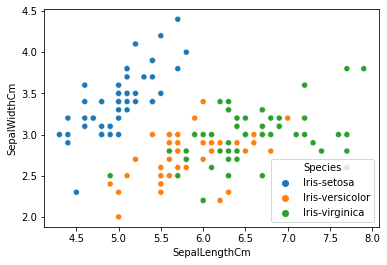

In [4]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)

In [10]:
df1 = iris[['SepalLengthCm', 'SepalWidthCm','Species']]
X = df1.iloc[:,0:2]
Y = df1.iloc[:,2].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).copy()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=4)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy Score for Linear Kernel is', accuracy_score(y_test,y_pred))

Accuracy_score with Linear Kernel is 0.868421052631579


In [17]:
clf = SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy Score for RBF kernel is', accuracy_score(y_test,y_pred))

Accuracy Score for RBF kernel is 0.868421052631579


In [20]:
clf = SVC(kernel='poly', degree=3, gamma='auto', C=C)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy Score for polynomial (degree 3) kernel is', accuracy_score(y_test,y_pred))

Accuracy Score for polynomial (degree 3) kernel is 0.8157894736842105


<img src="09_images/9_Implement_Kernels.PNG" width=600px/>

##  SVM – More than 2 Classes

### One vs all (more common)
* With K classes apply SVM once for each class
    * Class k vs all remaining classes
* Each SVM classifier gives a score for class k (vs all others)
    * The score is the estimated function value
* Predict the class k that has the highest score

### One vs One (All pairs)
* K classes give (K choose 2) possible pairs
* Conduct an SVM for each pair
* Keep track of which class wins each time
* Predict the class with the most wins

##  Pros and Cons of SVM

### Pros:
* Works well with when the number of features is large
* Works well when number of features exceeds the number of observations
* Memory efficient for prediction because only support vectors (not all observations) are needed

### Cons:
* When the data sets are really large, training time can be very long
* Does not work as well when there is a lot of noise
* Probability estimates are ad‐hoc
* SVM is sensitive to scaling of x‐variables

## Reference

[1] Polamuri, S. (2017, February 19). Support vector machine (Svm classifier) implemenation in python with Scikit-learn. Dataaspirant. https://dataaspirant.com/svm-classifier-implemenation-python-scikit-learn/. 